In [26]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cycler import cycler
import matplotlib.pyplot as plt

In [27]:
pc_db = pd.read_csv('data/apparent_per_capita_alcohol_consumption_1977_2018.csv', delimiter=None)

In [28]:
pc_db.head(10)

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518519,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879157,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667
5,alabama,2013,1.14,0.25,0.60,1.99,270.222222,49.612403,124.574209,424.533333
6,alabama,2012,1.16,0.24,0.60,2.00,274.962963,47.627907,124.574209,426.666667
7,alabama,2011,1.16,0.24,0.59,1.98,274.962963,47.627907,122.497972,422.400000
8,alabama,2010,1.17,0.23,0.58,1.98,277.333333,45.643411,120.421736,422.400000
9,alabama,2009,1.19,0.22,0.57,1.98,282.074074,43.658915,118.345499,422.400000


In [29]:
pc_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  2352 non-null   object 
 1   year                                   2352 non-null   int64  
 2   ethanol_beer_gallons_per_capita        2352 non-null   float64
 3   ethanol_wine_gallons_per_capita        2352 non-null   float64
 4   ethanol_spirit_gallons_per_capita      2352 non-null   float64
 5   ethanol_all_drinks_gallons_per_capita  2352 non-null   float64
 6   number_of_beers                        2352 non-null   float64
 7   number_of_glasses_wine                 2352 non-null   float64
 8   number_of_shots_liquor                 2352 non-null   float64
 9   number_of_drinks_total                 2352 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 183.9+ KB


In [30]:
pc_db.describe()

,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
count,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000
mean,1997.500000,1.279269,0.346144,0.850391,2.476063,303.234064,68.692085,176.561343,528.226757
std,12.123496,0.228744,0.182142,0.347001,0.609605,54.220899,36.145971,72.045606,130.049158
min,1977.000000,0.580000,0.080000,0.360000,1.190000,137.481481,15.875969,74.744526,253.866667
25%,1987.000000,1.120000,0.210000,0.650000,2.130000,265.481481,41.674419,134.955393,454.400000
50%,1997.500000,1.270000,0.310000,0.770000,2.360000,301.037037,61.519380,159.870235,503.466667
75%,2008.000000,1.400000,0.450000,0.960000,2.700000,331.851852,89.302326,199.318735,576.000000
max,2018.000000,2.170000,1.210000,3.560000,6.320000,514.370370,240.124031,739.140308,1348.266667


In [31]:
for cols in sorted(pc_db):
    print(cols)

ethanol_all_drinks_gallons_per_capita
ethanol_beer_gallons_per_capita
ethanol_spirit_gallons_per_capita
ethanol_wine_gallons_per_capita
number_of_beers
number_of_drinks_total
number_of_glasses_wine
number_of_shots_liquor
state
year


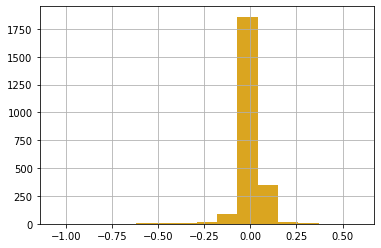

In [32]:
bg = pc_db['ethanol_beer_gallons_per_capita']
bg.diff().hist(color='goldenrod', bins=15);

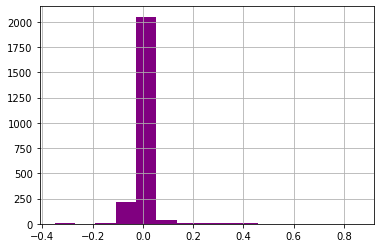

In [33]:
wg = pc_db['ethanol_wine_gallons_per_capita']
wg.diff().hist(color='purple', bins=15);

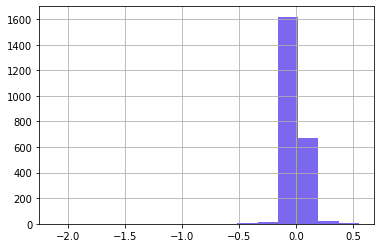

In [34]:
sg = pc_db['ethanol_spirit_gallons_per_capita']
sg.diff().hist(color='mediumslateblue', bins=15);

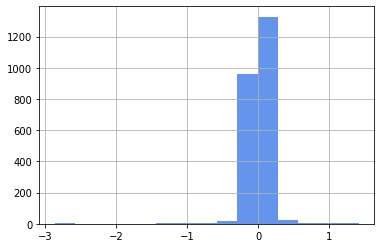

In [35]:
dg = pc_db['ethanol_all_drinks_gallons_per_capita']
dg.diff().hist(color='cornflowerblue', bins=15);

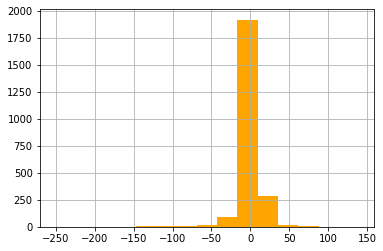

In [36]:
num_b = pc_db['number_of_beers']
num_b.diff().hist(color='orange', bins=15);

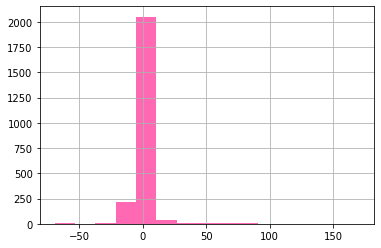

In [37]:
num_w = pc_db['number_of_glasses_wine']
num_w.diff().hist(color='hotpink', bins=15);

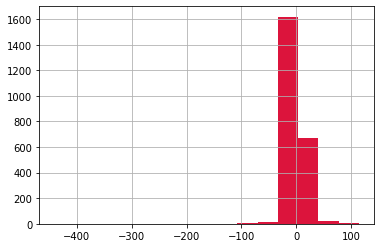

In [38]:
sl = pc_db['number_of_shots_liquor']
sl.diff().hist(color='crimson', bins=15);

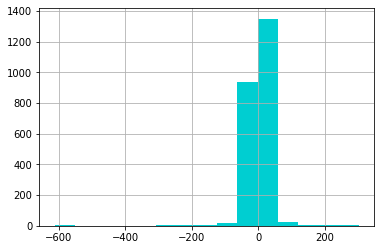

In [39]:
num_dt = pc_db['number_of_drinks_total']
num_dt.diff().hist(color='darkturquoise', bins=15);

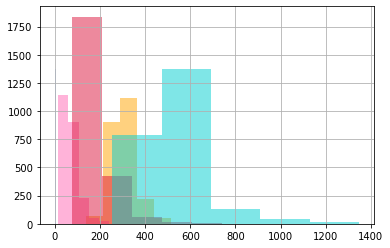

In [40]:
pc_db['ethanol_beer_gallons_per_capita'].hist(color='goldenrod', bins=5, alpha=0.5);
pc_db['ethanol_wine_gallons_per_capita'].hist(color='purple', bins=5, alpha=0.5);
pc_db['ethanol_spirit_gallons_per_capita'].hist(color='mediumslateblue', bins=5, alpha=0.5);
pc_db['ethanol_all_drinks_gallons_per_capita'].hist(color='cornflowerblue', bins=5, alpha=0.5);
pc_db['number_of_beers'].hist(color='orange', bins=5, alpha=0.5);
pc_db['number_of_glasses_wine'].hist(color='hotpink', bins=5, alpha=0.5);
pc_db['number_of_shots_liquor'].hist(color='crimson', bins=5, alpha=0.5);
pc_db['number_of_drinks_total'].hist(color='darkturquoise', bins=5, alpha=0.5);

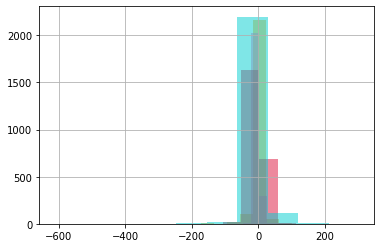

In [41]:
bg.diff().hist(color='goldenrod', bins=10, alpha=0.5);
wg.diff().hist(color='purple', bins=10, alpha=0.5);
sg.diff().hist(color='mediumslateblue', bins=10, alpha=0.5);
dg.diff().hist(color='cornflowerblue', bins=10, alpha=0.5);
num_b.diff().hist(color='orange', bins=10, alpha=0.5);
num_w.diff().hist(color='hotpink', bins=10, alpha=0.5);
sl.diff().hist(color='crimson', bins=10, alpha=0.5);
num_dt.diff().hist(color='darkturquoise', bins=10, alpha=0.5);

In [42]:
pc_db.columns

Index(['state', 'year', 'ethanol_beer_gallons_per_capita',
       'ethanol_wine_gallons_per_capita', 'ethanol_spirit_gallons_per_capita',
       'ethanol_all_drinks_gallons_per_capita', 'number_of_beers',
       'number_of_glasses_wine', 'number_of_shots_liquor',
       'number_of_drinks_total'],
      dtype='object')

In [43]:
df = pc_db[pc_db.loc[:, 'year']== 2015]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 3 to 2313
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  56 non-null     object 
 1   year                                   56 non-null     int64  
 2   ethanol_beer_gallons_per_capita        56 non-null     float64
 3   ethanol_wine_gallons_per_capita        56 non-null     float64
 4   ethanol_spirit_gallons_per_capita      56 non-null     float64
 5   ethanol_all_drinks_gallons_per_capita  56 non-null     float64
 6   number_of_beers                        56 non-null     float64
 7   number_of_glasses_wine                 56 non-null     float64
 8   number_of_shots_liquor                 56 non-null     float64
 9   number_of_drinks_total                 56 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.8+ KB


In [45]:
sdf = df.sort_values('number_of_drinks_total', ascending = False)

In [46]:
sdf.head(10)

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
1221,new hampshire,2015,1.87,0.88,1.95,4.70,443.259259,174.635659,404.866180,1002.666667
339,district of columbia,2015,1.14,1.02,1.67,3.82,270.222222,202.418605,346.731549,814.933333
297,delaware,2015,1.19,0.72,1.75,3.66,282.074074,142.883721,363.341444,780.800000
1179,nevada,2015,1.39,0.66,1.30,3.35,329.481481,130.976744,269.910787,714.666667
1431,north dakota,2015,1.58,0.35,1.33,3.26,374.518519,69.457364,276.139497,695.466667
1095,montana,2015,1.63,0.50,0.96,3.09,386.370370,99.224806,199.318735,659.200000
1893,vermont,2015,1.57,0.78,0.73,3.08,372.148148,154.790698,151.565288,657.066667
2061,wisconsin,2015,1.39,0.39,1.20,2.98,329.481481,77.395349,249.148418,635.733333
507,idaho,2015,0.94,1.14,0.79,2.87,222.814815,226.232558,164.022709,612.266667
45,alaska,2015,1.11,0.53,1.20,2.84,263.111111,105.178295,249.148418,605.866667


In [47]:
sdf2 = df.sort_values(['number_of_drinks_total', 'ethanol_all_drinks_gallons_per_capita'], ascending = [0,0])

In [48]:
sdf2.head(10)

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
1221,new hampshire,2015,1.87,0.88,1.95,4.70,443.259259,174.635659,404.866180,1002.666667
339,district of columbia,2015,1.14,1.02,1.67,3.82,270.222222,202.418605,346.731549,814.933333
297,delaware,2015,1.19,0.72,1.75,3.66,282.074074,142.883721,363.341444,780.800000
1179,nevada,2015,1.39,0.66,1.30,3.35,329.481481,130.976744,269.910787,714.666667
1431,north dakota,2015,1.58,0.35,1.33,3.26,374.518519,69.457364,276.139497,695.466667
1095,montana,2015,1.63,0.50,0.96,3.09,386.370370,99.224806,199.318735,659.200000
1893,vermont,2015,1.57,0.78,0.73,3.08,372.148148,154.790698,151.565288,657.066667
2061,wisconsin,2015,1.39,0.39,1.20,2.98,329.481481,77.395349,249.148418,635.733333
507,idaho,2015,0.94,1.14,0.79,2.87,222.814815,226.232558,164.022709,612.266667
45,alaska,2015,1.11,0.53,1.20,2.84,263.111111,105.178295,249.148418,605.866667


In [49]:
total_drinks_per_state = sdf2[['state', 'number_of_drinks_total']]

In [50]:
total_drinks_per_state

,state,number_of_drinks_total
1221,new hampshire,1002.666667
339,district of columbia,814.933333
297,delaware,780.800000
1179,nevada,714.666667
1431,north dakota,695.466667
1095,montana,659.200000
1893,vermont,657.066667
2061,wisconsin,635.733333
507,idaho,612.266667
45,alaska,605.866667
